# Generalized Advantage Estimation (GAE)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Packages loaded.")

Packages loaded.


### Plot Values and GAEs
#### Values
$V(s_t) = \sum_{l=0}^{\infty} \gamma^l r(s_{t+l})$
and $V(s_t) = r(s_t) + \gamma V(s_{t+1})$
#### Generalized Advantage Estimates
$\delta^V_t = r_t + \gamma V(s_{t+1}) - V(s_t)$ - (9)

$\hat{A}_t^{\text{GAE}(\gamma,\lambda)}
=
\sum_{l=0}^{\infty} (\gamma \lambda)^l
\delta^V_{t+l}
$ - (16)


In [3]:
def plot_values_gaes(time,rewards,gamma,lamda):
    L = times.shape[0]
    # Compute values
    values = np.zeros(L); values[L-1] = rewards[L-1]
    for t in reversed(range(L-1)):
        values[t] = rewards[t] + gamma*values[t+1]
    # Compute GAEs
    gaes = np.zeros(L); gaes[L-1] = rewards[L-1]
    for t in reversed(range(L-1)):
        delta = rewards[t] + (gamma*values[t+1]) - values[t]
        gaes[t] = delta + (gamma*lamda*gaes[t+1])
    # Plot rewards
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.bar(times,rewards,color='b')
    plt.title("Rewards",fontsize=15)
    plt.xlabel("Time",fontsize=15)
    # Plot values
    plt.subplot(1,3,2)
    plt.bar(times,values,color='r')
    plt.title("Values ($\gamma$:%.2f)"%(gamma),fontsize=15)
    plt.xlabel("Time",fontsize=15)
    # Plot GAEs
    plt.subplot(1,3,3)
    plt.bar(times,gaes,color='g')
    plt.title("GAE ($\gamma$:%.2f $\lambda$:%.2f)"%(gamma,lamda),fontsize=15)
    plt.xlabel("Time",fontsize=15)
    plt.show()
print ("Helper function ready.")

Helper function ready.


### MDP 1

In [4]:
gamma = 0.8 # discount factor (or variance reduction in GAE)
lamda = 0.8 # GAE discount
times = np.linspace(0,9,10)
rewards = np.array([0.1,0.1,0.1,0.1,-5,0.1,0.1,0.1,0.1,10])

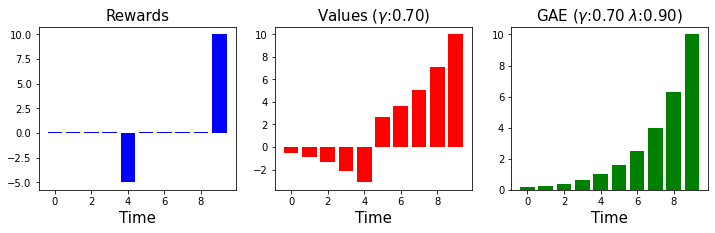

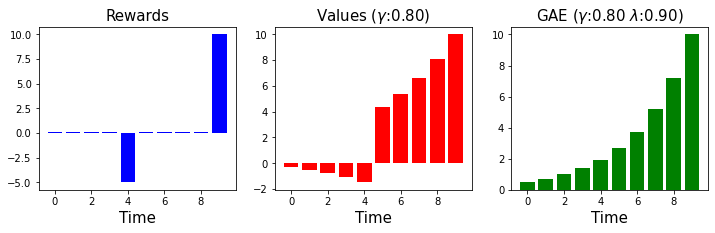

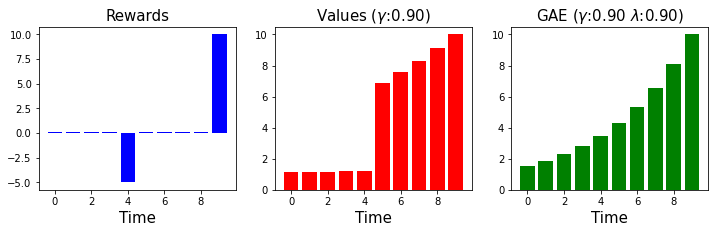

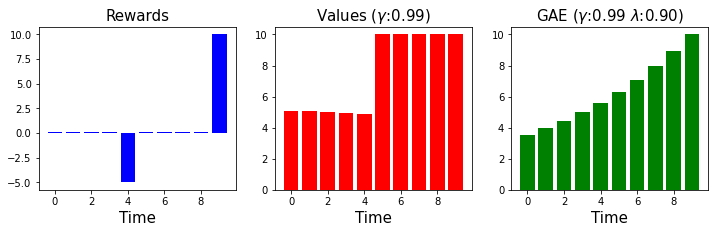

In [5]:
plot_values_gaes(times,rewards,gamma=0.7,lamda=0.9)
plot_values_gaes(times,rewards,gamma=0.8,lamda=0.9)
plot_values_gaes(times,rewards,gamma=0.9,lamda=0.9)
plot_values_gaes(times,rewards,gamma=0.99,lamda=0.9)